In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from source.lib import text_only_korean

수집 데이터 전처

In [5]:
df = pd.read_csv('./data/reviews_1647645839.csv')
df

,id,title,review,score,sentiment
0,17998769,반지의 제왕: 왕의 귀환,판타지를 넘어 영화 역사에 남을 명작이다. 내가 이걸 왜 극장에서 못봤을까.... ...,10.0,NaN
1,17998767,나일 강의 죽음,이집트여행하는느낌의 영화,8.0,NaN
2,17998766,킹메이커,목포 연설 장면은 넋을 잃고 보게 된다.,10.0,NaN
3,17998765,기억의 밤,그저 그렇네요. 뻔한 반전과 결말.,4.0,NaN
4,17998764,더 배트맨,더 배트맨 조커처럼 몰입감이 있으면 추천 반대로 지루하면 비추천,1.0,NaN
...,...,...,...,...,...
9995,17988421,오! 수정,이해할 수 없는 남자와 이해해주는 여자,7.0,NaN
9996,17988420,이상한 나라의 수학자,배우들 연기력이 장난아님. 역시 최민식 배우는 클라스가 다름!,10.0,NaN
9997,17988419,블랙라이트,그래도 최근에 나왔던 영화들에 비해 내용이 되게 흥미진진했음 리암 니슨이 덜뛰는 대...,10.0,NaN
9998,17988418,더 배트맨,누구나 시작은 어설픈 법. 그래서 더 매력적인 히어로,10.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  int64  
 1   title      10000 non-null  object 
 2   review     9359 non-null   object 
 3   score      10000 non-null  float64
 4   sentiment  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [7]:
df.isna().sum()

id               0
title            0
review         641
score            0
sentiment    10000
dtype: int64

In [8]:
# drop duplicated rows
print('before drop duplicated : ',df.shape[0])
df.drop_duplicates(subset=['id'],ignore_index=True,inplace=True)
print('after drop duplicated : ',df.shape[0])

before drop duplicated :  10000
after drop duplicated :  9998


In [9]:
# don't need any review that has no review
print('before drop duplicated : ',df.shape[0])
df.dropna(subset=['review'],axis=0,inplace=True)
print('after drop duplicated : ',df.shape[0])

before drop duplicated :  9998
after drop duplicated :  9357


In [10]:
df.isna().sum()

id              0
title           0
review          0
score           0
sentiment    9357
dtype: int64

In [11]:
df.shape

(9357, 5)

<AxesSubplot:xlabel='score', ylabel='count'>

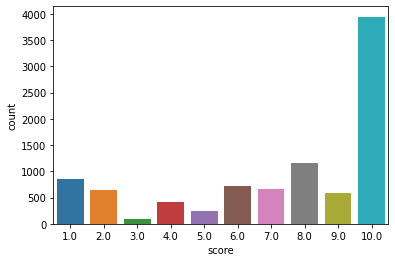

In [12]:
sns.countplot(data=df,x='score')

훈련용 학습셋이 별도로 필요할 것으로 보임

[출처](https://github.com/e9t/nsmc/)로부터 추가 데이터셋을 구비함

직접 구비한 데이터셋은 차후 사용

In [13]:
df.to_csv('./data/processed/df.csv',index=False)